### Generación de features 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
torre_me = '../../database/torrePozoIzquierdo_JUL_AGO_2004/torreME.txt'

In [3]:
parse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M:%S')
df_torre_me = pd.read_csv(torre_me, skiprows=12,  
                          delim_whitespace=True, 
                          header=None, 
                          names=['day', 'time', 'direccion_viento', 'v_h10', 'v_h20', 'v_h40'],
                          parse_dates=[['day', 'time']], 
                          date_parser=parse,
                          index_col=0)
df_vh40 = df_torre_me[['v_h40']]

### Creamos función para generar features a partir del método de la ventana.

In [63]:
def get_features(ts, date=None, window_size=10, horizont=1, padding=0,
                write_csv_file=False, filename=None):
    # target index (date)
    if date is not None:
        date = date[window_size + horizont -1:]
        df_target_date = pd.DataFrame({'target_date':date})
    # features
    timesteps = len(ts) - (window_size + horizont + padding - 1)
    features = np.zeros((timesteps, window_size), dtype = np.float32)
    for t in range(padding, timesteps):
        features[t][0: window_size] = ts[t : t+window_size]
    df_features = pd.DataFrame(features, 
                               columns=['f_{0}'.format(i) for i in range(window_size)])
    # labels
    labels = np.zeros((timesteps), dtype=np.float32) 
    for t in range(padding, timesteps):
        offset = t + window_size + horizont - 1
        labels[t] = ts[offset]
    df_target = pd.DataFrame({'target':labels})
    
    # concat all df
    df = pd.concat([df_target_date, df_features, df_target], axis=1)
    
    if write_csv_file is True:
        df.to_csv('{0}_h_{1}.csv'.format(filename, horizont),
                  sep=';', float_format='%.2f', index=False)
    return df

La serie original debe ser almacenada dentro de un "dataframe" de Pandas. Es opcional tener un índice con el momento de la medida, y también almacenar el "dataframe" resultante en disco.

La función **get_features** devuelve un "dataframe" con la fecha en que ha medido el **target**,
las **features**, tantas como dimensión del "lag" o la ventana, y el target.

In [64]:
# Separamos el dataframe en un array con los valores medidos y, en una lista con la fecha en que se
# ha hecho la medida.
ts = df_vh40['v_h40']
date = df_vh40.index

In [65]:
# df para h=1
df_h1 = get_features(ts, date, window_size=10, horizont=1,
                     write_csv_file=True, 
                     filename='pozo_izquierdo_torre_me')
df_h1.head(5)

,target_date,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,target
0,2004-07-01 00:10:00,9.6,9.6,9.8,9.6,10.2,10.2,10.8,10.5,10.4,10.7,11.5
1,2004-07-01 00:11:00,9.6,9.8,9.6,10.2,10.2,10.8,10.5,10.4,10.7,11.5,12.2
2,2004-07-01 00:12:00,9.8,9.6,10.2,10.2,10.8,10.5,10.4,10.7,11.5,12.2,12.3
3,2004-07-01 00:13:00,9.6,10.2,10.2,10.8,10.5,10.4,10.7,11.5,12.2,12.3,11.7
4,2004-07-01 00:14:00,10.2,10.2,10.8,10.5,10.4,10.7,11.5,12.2,12.3,11.7,12.5


In [68]:
# tabla auxiliar con target
df_h1_aux = df_h1[['target_date', 'target']]
df_h1_aux.head(5)

,target_date,target
0,2004-07-01 00:10:00,11.5
1,2004-07-01 00:11:00,12.2
2,2004-07-01 00:12:00,12.3
3,2004-07-01 00:13:00,11.7
4,2004-07-01 00:14:00,12.5


In [69]:
df_h1.shape

(87113, 12)

In [78]:
# df para h=2
df_h2 = get_features(ts, date, window_size=10, horizont=2,
                     write_csv_file=True, 
                     filename='pozo_izquierdo_torre_me')
df_h1.head(5)

,target_date,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,target
0,2004-07-01 00:10:00,9.6,9.6,9.8,9.6,10.2,10.2,10.8,10.5,10.4,10.7,11.5
1,2004-07-01 00:11:00,9.6,9.8,9.6,10.2,10.2,10.8,10.5,10.4,10.7,11.5,12.2
2,2004-07-01 00:12:00,9.8,9.6,10.2,10.2,10.8,10.5,10.4,10.7,11.5,12.2,12.3
3,2004-07-01 00:13:00,9.6,10.2,10.2,10.8,10.5,10.4,10.7,11.5,12.2,12.3,11.7
4,2004-07-01 00:14:00,10.2,10.2,10.8,10.5,10.4,10.7,11.5,12.2,12.3,11.7,12.5


In [71]:
df_h2.shape

(87112, 12)

In [72]:
df_h2_aux = df_h2[['target_date', 'target']]
df_h2_aux.head(5)

,target_date,target
0,2004-07-01 00:11:00,12.2
1,2004-07-01 00:12:00,12.3
2,2004-07-01 00:13:00,11.7
3,2004-07-01 00:14:00,12.5
4,2004-07-01 00:15:00,12.1


In [79]:
# df para h=3
df_h3 = get_features(ts, date, window_size=10, horizont=3,
                     write_csv_file=True, 
                     filename='pozo_izquierdo_torre_me')
df_h3.head(5)

,target_date,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,target
0,2004-07-01 00:12:00,9.6,9.6,9.8,9.6,10.2,10.2,10.8,10.5,10.4,10.7,12.3
1,2004-07-01 00:13:00,9.6,9.8,9.6,10.2,10.2,10.8,10.5,10.4,10.7,11.5,11.7
2,2004-07-01 00:14:00,9.8,9.6,10.2,10.2,10.8,10.5,10.4,10.7,11.5,12.2,12.5
3,2004-07-01 00:15:00,9.6,10.2,10.2,10.8,10.5,10.4,10.7,11.5,12.2,12.3,12.1
4,2004-07-01 00:16:00,10.2,10.2,10.8,10.5,10.4,10.7,11.5,12.2,12.3,11.7,13.6


In [74]:
df_h3.shape

(87111, 12)

In [75]:
df_h3_aux = df_h3[['target_date', 'target']]
df_h3_aux.head(5)

,target_date,target
0,2004-07-01 00:12:00,12.3
1,2004-07-01 00:13:00,11.7
2,2004-07-01 00:14:00,12.5
3,2004-07-01 00:15:00,12.1
4,2004-07-01 00:16:00,13.6


## Split
Para separar la serie en train, validation y test se procede de la siguiente format:
* Para separar en train y test: se calcula el 80 de la muestra en valor cuantitativo. Luego se separar el "dataframe" con **iloc** para respetar el orden (esta separació tiene que respetar el momento de la medida). 

* Para separar en train y validation: se selecciona la parte del "dataframe" de test, y separamos esta muestra en train y validation con el método de *scikit* **train_test_split**.

In [25]:
train_size = int((df_h1.shape[0] * 80) / 100)

In [47]:
df_h1_train = df_h1.iloc[0:train_size]
df_h1_test_set = df_h1.iloc[train_size:]

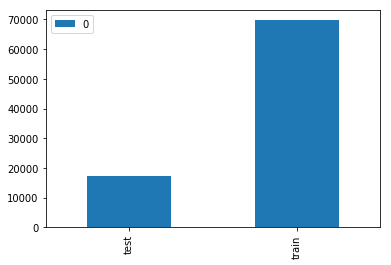

In [33]:
pd.DataFrame({'train': [df_h1_train.shape[0]],
              'test': [df_h1_test.shape[0]]}).T.plot(kind='bar', legend=False)

In [45]:
df_h1_train_set, df_h1_validation_set = train_test_split(df_h1_train, test_size=0.2)

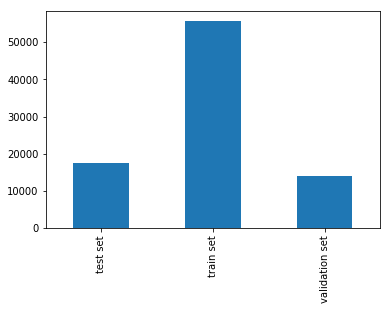

In [48]:
pd.DataFrame({'train set': [df_h1_train_set.shape[0]],
              'validation set': [df_h1_validation_set.shape[0]],
              'test set': [df_h1_test_set.shape[0]]}).T.plot(kind='bar',
                                                         legend=False);

In [50]:
print(df_h1_train_set.shape[0])
print(df_h1_validation_set.shape[0])
print(df_h1_test_set.shape[0])

55752
13938
17423


In [51]:
df_h1_train_set.shape[0] + df_h1_validation_set.shape[0] + df_h1_test_set.shape[0]

87113

Función **dataframe_split** realiza todos los pasos anteriores.

In [76]:
def dataframe_split(df):
    train_size = int((df.shape[0] * 80) / 100)
    # split: df in train and test sets
    df_train_set = df.iloc[0:train_size]
    df_test_set = df.iloc[train_size:]
    # split: train in train and validation sets
    df_train_set, df_validation_set = train_test_split(df_train_set, test_size=0.2)
    
    return {'train_set' : df_train_set,
            'validation_set': df_validation_set,
            'test_set': df_test_set}

In [86]:
data = dataframe_split(pd.read_csv('pozo_izquierdo_torre_me_h_1.csv', delimiter=';'))

In [87]:
data.keys()

dict_keys(['train_set', 'validation_set', 'test_set'])

In [94]:
 data['train_set'].shape[0] + data['validation_set'].shape[0] + data['test_set'].shape[0]

87113